# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
# План работы
[**1. Осмотр и обработка данных**](#cell1)
Путь к файлу: /datasets/games.csv

[**2. Подготовка данных**](#cell2)
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

[**3. Исследовательский анализ данных**](#cell3)
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

[**4. Портрет пользователя каждого региона**](#cell4)
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

[**5. Проверка гипотез**](#cell5)
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

[**6. Общий вывод**](#cell6)

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## Осмотр и обработка данных  <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(df.describe())
display(df.loc[df.duplicated(subset=['Name', 'Platform', 'Year_of_Release', 'Genre'], keep=False)]) #поищем дубликаты
display(df.loc[df.duplicated(subset=['Name', 'Platform'], keep=False)]) #поищем дубликаты по названию и платформе
display(df.duplicated().sum()) #полных дубликатов нет

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


0

Мы нашли дубликат - строка 16230 - совпадает название, платформа, жанр и год релиза, удалим на следующем этапе предобработки. Ещё нашли 2 дубликата с пропусками названия и платформы - их мы предобработаем на следующем этапе. Второй поиск дубликатов проводили по названию и платформе дал информацию что в таблице много игр с одинаковым названием и платформой, но с разными датами релизов. Данные строки нельзя назвать дубликатами, поэтому мы их трогать не будем, они важны нам для дальнейшего анализа.

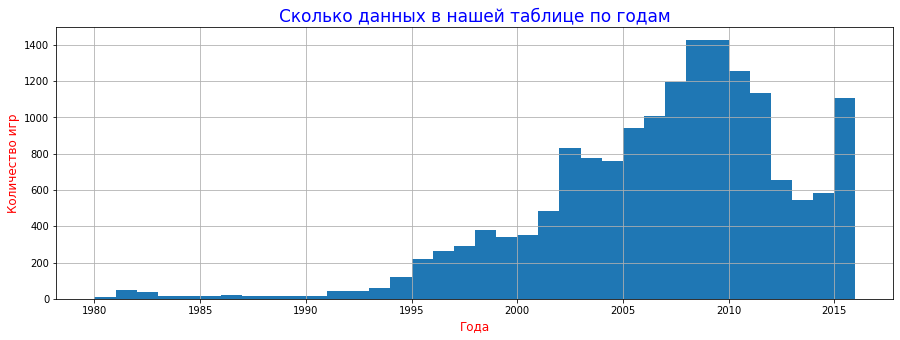

In [5]:
#посмотрим количество данных по годам
plt.figure(figsize=(15,5))
df.Year_of_Release.hist(bins=36)
plt.title('Cколько данных в нашей таблице по годам', fontsize=17, color='blue')
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Количество игр',fontsize=12, color='red')
plt.grid(True)
plt.show()

In [6]:
#посмотрим уникальные значения в столбце с жанром
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

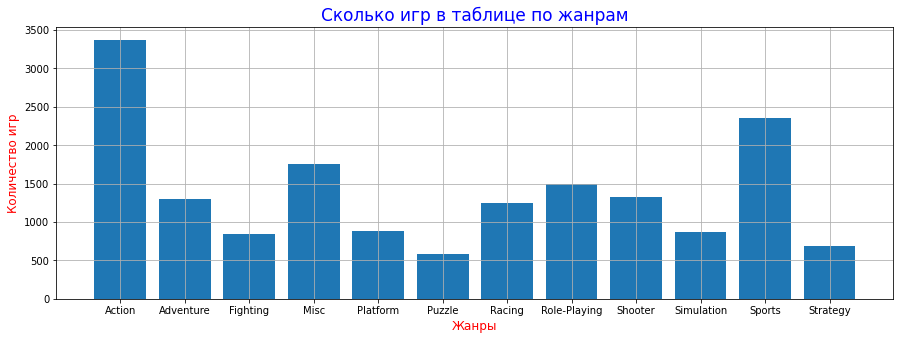

In [7]:
#посмотрим количество данных по жанрам игр
df_genre_names = df.groupby(['Genre']).agg({'Name':'count'}).reset_index()
plt.figure(figsize=(15,5))
plt.bar(df_genre_names['Genre'], df_genre_names['Name'])
plt.title('Cколько игр в таблице по жанрам', fontsize=17, color='blue')
plt.xlabel('Жанры',fontsize=12, color='red')
plt.ylabel('Количество игр',fontsize=12, color='red')
plt.grid(True)
plt.show()

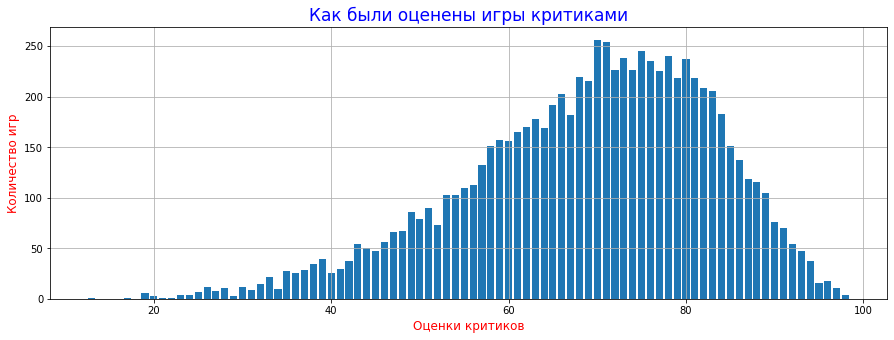

In [8]:
#посмотрим количество данных по рейтенгу критиков
df_critic_names = df.groupby(['Critic_Score']).agg({'Name':'count'}).reset_index()
plt.figure(figsize=(15,5))
plt.bar(df_critic_names['Critic_Score'], df_critic_names['Name'])
plt.title('Как были оценены игры критиками', fontsize=17, color='blue')
plt.xlabel('Оценки критиков',fontsize=12, color='red')
plt.ylabel('Количество игр',fontsize=12, color='red')
plt.grid(True)
plt.show()

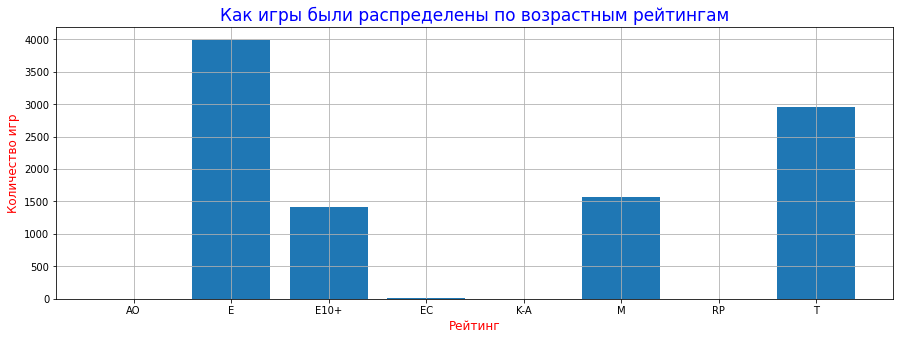

In [9]:
#посмотрим количество данных по рейтенгу ESRB 
df_rating_names = df.groupby(['Rating']).agg({'Name':'count'}).reset_index()
plt.figure(figsize=(15,5))
plt.bar(df_rating_names['Rating'], df_rating_names['Name'])
plt.title('Как игры были распределены по возрастным рейтингам', fontsize=17, color='blue')
plt.xlabel('Рейтинг',fontsize=12, color='red')
plt.ylabel('Количество игр',fontsize=12, color='red')
plt.grid(True)
plt.show()

In [10]:
#проверим количество пропусков по столбцам
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод:** на начальном этапе видно, что данные представленны неравномерно. Больше всего данных в таблице за 2008, 2009, 2010 года и явный скачок количества данных за 2016 год. По жанрам преимущество за Экшн и спортивными играми. Средняя оценка критиков 69 из 100. По возрастному рейтингу больше всего игр "Для всех" и "Для подростков". Много пропусков, неккоретные типы данных в некоторых столбцах - всё это предстоит предобработать на следующем этапе.

## Осмотр и обработка данных  <a class="anchor" id="second-bullet"></a>
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [11]:
#для начала переименум столбцы - приведем все к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
#далее перейдем к изменению типов данных. Выясним почему столбец с оценкой пользователей представлен как object
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
0.7       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Видим 2424 tbd значения. Это сокращение часто используется в сфере компьютерных игр и буквально расшифровывается как To Be Determined - "Будет определено" - и обозначает обычно пропуски. Заменим tbd на более понятный nan.

In [13]:
df['user_score'] = df.user_score.replace('tbd',np.nan)
df['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.6      2
0.2      2
0.7      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [14]:
#заменяем тип данных user_score на число с плавающей точкой, так как именно в таком виде представленны пользовательские оценки
#и приведем к целому числу значения в столбце year_of_release
df['user_score'] = df['user_score'].astype(float)
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [15]:
#перейдем к обработке пропусков - выясним для начала сколько таких значений в нашей таблице
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Удалим строчки с пропущенными названиями игр и платформ, так как это те наших 2 дубля, которые мы нашли ранее, и они помешают нам при дальнейшем анализе.

In [16]:
df.dropna(subset=['name'], inplace=True)
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.545863
rating             0.404715
dtype: float64

Удалим строчки с пропущенными годами, так как доля их незначительна 0.016, а причину пропусков мы выяснить не можем. Заменять эти пропуски на года из других строк (по этим же играм и платформам) нет смысла, так как ранее, когда искали дубликаты, мы выяснили что в таблице представленны также одни и те же игры, но с разными датами релизов. В дальнейшем анализе значения этого столбца нам крайне важны, поэтому принято решение удалить эти строки.

In [17]:
df.dropna(subset=['year_of_release'], inplace=True)
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
dtype: float64

Пропуски в столбцах с оценками мы удалять/заполнять не будем, так как нам также не известны причины отсутствия этих данных, но в данном случае доля пропущенных значений слишком велика и удаление повлияет на дальнейший анализ.

In [18]:
df_nan = df.loc[df['rating'] == 'NaN', 'na_sales'] 
df_nan

Series([], Name: na_sales, dtype: float64)

Обработаем часть пропусков в столбце рейтингов. Рейтинг ESRB не используется в Японии. Посчитаем количество пропусков для всех регионов.

In [19]:
#заменим тестово пропуски tbd
df['rating'] = df['rating'].fillna('tbd')
df['rating'].value_counts()

tbd     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [20]:
#заменим тестово пропуски tbd
na_rating = df.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False)
display(na_rating)

eu_rating = df.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False)
display(eu_rating)

jp_rating = df.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False)
display(jp_rating)

,rating,na_sales
1,E,1274.24
8,tbd,1225.84
7,T,747.60
5,M,742.89
2,E10+,345.50
4,K-A,2.56
3,EC,1.53
0,AO,1.26
6,RP,0.00


,rating,eu_sales
1,E,703.87
8,tbd,609.65
5,M,480.00
7,T,421.79
2,E10+,183.35
0,AO,0.61
4,K-A,0.27
3,EC,0.11
6,RP,0.03


,rating,jp_sales
8,tbd,836.74
1,E,197.96
7,T,150.70
5,M,63.58
2,E10+,40.20
4,K-A,1.46
0,AO,0.00
3,EC,0.00
6,RP,0.00


Эксперемент удался. Мы видим аномалию - пропуски по рейтингам в Японии вызваны тем, что для Японии данные рейтинг не информативен и в пропуски попали скорее всего игры Для взрослых или Игры для всех. Поэтому оставим в данном столбце пропуски, но при анализе рейтинга будем учитывать, что для Японии данный рейтинг не информативен.

In [21]:
#вернем nan вместо tbd
df['rating'] = df.rating.replace('tbd',np.nan)
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
dtype: float64

In [22]:
#приведем значения в столбцах name, genre и platform к нижнему регистру
df.name = df.name.str.lower()
df.platform = df.platform.str.lower()
df.genre = df.genre.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
#удалим строку 16230, так как ранее мы выяснили что это дубликат строки 
df.drop(labels = [16230],axis = 0, inplace=True)
df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [24]:
#создадим новый столбец - суммарные значения по всем регионам
df['total_sales']  = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Исследовательский анализ  <a class="anchor" id="third-bullet"></a>
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

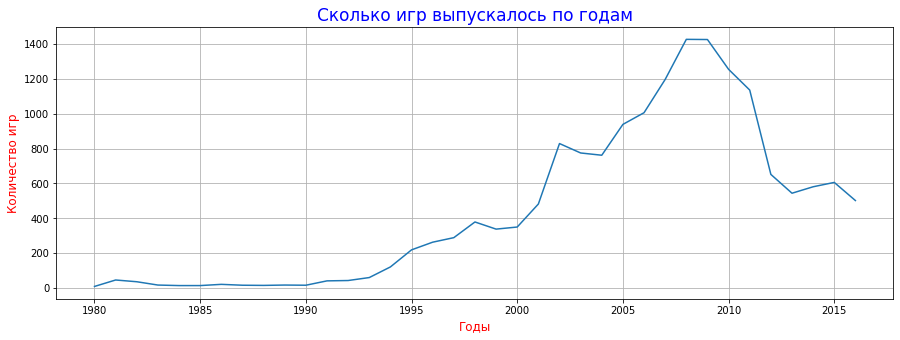

In [25]:
df_year_name = df.groupby('year_of_release').agg({'name':'count'}).reset_index()
plt.figure(figsize=(15,5))
plt.plot(df_year_name['year_of_release'], df_year_name['name'])
plt.title('Сколько игр выпускалось по годам', fontsize=17, color='blue')
plt.xlabel('Годы',fontsize=12, color='red')
plt.ylabel('Количество игр',fontsize=12, color='red')
plt.grid(True)
plt.show()

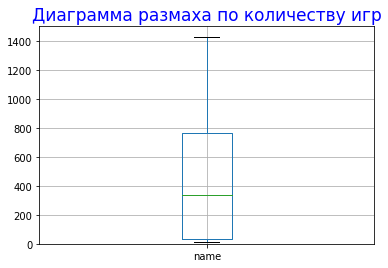

,year_of_release,name
count,37.000000,37.000000
mean,1998.000000,444.405405
std,10.824355,451.591535
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


In [26]:
#Посмотрим диаграмму размаха и квартили
year_games = df.groupby(['year_of_release']).agg({'name':'count'}).reset_index()
year_games.boxplot('name')
plt.ylim(0, 1500)
plt.title('Диаграмма размаха по количеству игр', fontsize=17, color='blue')
plt.show()
display(year_games.describe())

Начало роста появления игр 1994 год. Резкие скачки роста в 2000 и 2004 обусловлены скорее всего выходом консолей и развитием игровой индустрии. Далее после 2007 резкий спад, вызванный насещием рынка. Для прогноза на следующий период нам важны данные после 2006 года, так как они актуальнее всего описывают текущую ситацию на игровом рынке. Поэтому актуальным периодом для прогноза скорее всего будет период после 2006 года.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

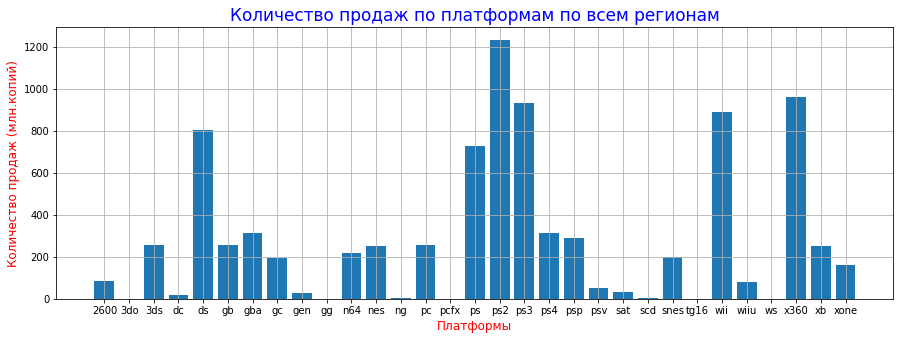

In [27]:
#изучим количество продаж по платформам
platform_sales = df.groupby('platform').agg({'total_sales':'sum'}).reset_index()
plt.figure(figsize=(15,5))
plt.bar(platform_sales['platform'], platform_sales['total_sales'])
plt.title('Количество продаж по платформам по всем регионам', fontsize=17, color='blue')
plt.xlabel('Платформы',fontsize=12, color='red')
plt.ylabel('Количество продаж (млн.копий)',fontsize=12, color='red')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b> ⚠️ Совет: </b>Визуализация не очень удачная. Линейные графики используются для отображения динамики, например продажи по годам. В этом случае лучше использовать столбиковую диаграмму

<div class="alert alert-block alert-info">
<b>Исправила </b> 
</div>

In [28]:
#посмотрим ТОП 5 платформ по продажам
platform_sales.sort_values(by='total_sales', ascending=False).head(5)

,platform,total_sales
16,ps2,1233.56
28,x360,961.24
17,ps3,931.33
25,wii,891.18
4,ds,802.78


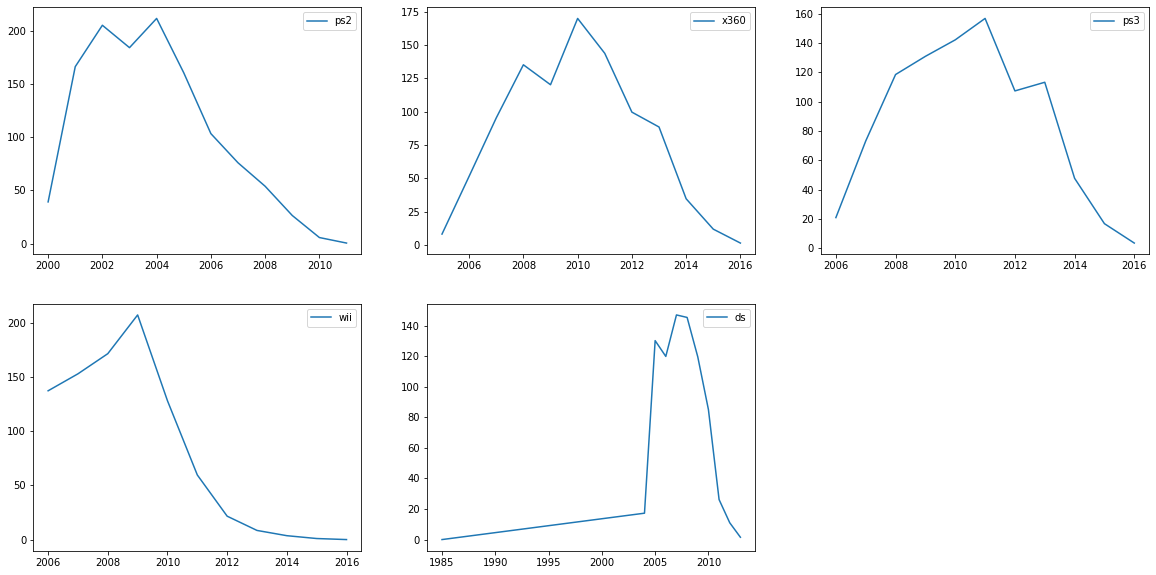

In [29]:
ps2 = df[df['platform'] == 'ps2'].groupby('year_of_release').agg({'total_sales':'sum'})
x360 = df[df['platform'] == 'x360'].groupby('year_of_release').agg({'total_sales':'sum'})
ps3 = df[df['platform'] == 'ps3'].groupby('year_of_release').agg({'total_sales':'sum'})
wii = df[df['platform'] == 'wii'].groupby('year_of_release').agg({'total_sales':'sum'})
ds = df[df['platform'] == 'ds'].groupby('year_of_release').agg({'total_sales':'sum'})
plt.figure(figsize=(20, 10)) # настроим размер поля графиков
plt.subplot(231)
plt.plot(ps2)
plt.legend(['ps2'])
plt.subplot(232)
plt.plot(x360)
plt.legend(['x360'])
plt.subplot(233)
plt.plot(ps3)
plt.legend(['ps3'])
plt.subplot(234)
plt.plot(wii)
plt.legend(['wii'])
plt.subplot(235)
plt.plot(ds)
plt.legend(['ds'])

Продажи по платформам сильно отличаются друг от друга. Выделила для анализа топ-5 платформ и тут мы видим закономерность у первых трёх: появление и исчезновение платформы занимает в среднем 10 лет. Но как мы видим не для всех платформ характерна такая тенденция, например Nintendo DS потребовалось 20 лет для того чтобы выстрелить по продажам и ещё 10 лет до окончательного спада, а wii (наследница того же Nintendo) уходила с рынка более 4х лет и общий цикл жизни платформы был более 10 лет. Делаем вывод, что лидерам рынка платформ требуется в среднем 10 лет на появление и исчезновение, но менее популярным платформам требуется больше времени и у них явной закономерности не наблюдается, слишком много факторов влиияет на выход/рост продаж и исчезновение игровых платформ. Посчитаем сколько просуществовали все платформы и найдем среднее.

In [30]:
#посмотрим сколько просуществовали платформы
df_sale_time = df.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
display(df_sale_time['platform'].value_counts().head(10))

pc      26
gb      13
psp     12
ps2     12
nes     12
x360    12
ds      11
ps3     11
wii     11
2600    10
Name: platform, dtype: int64

In [31]:
df_sale_time['platform'].value_counts().describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: platform, dtype: float64

**Вывод:** Чаще всего появляются новые и исчезают старые платформы ориентировочно за 10-12 лет, среднее значение 7 лет. 	ТОП5 платформ по продажам за весь период ps2, x360, ps3, wii, ds.

### Учитывайте в дальнейшей работе только данные за актуальный период.
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.


Ранее предположили что актуальный период начинается с 2014 года, а с учетом того что жизненный цикл платформы чаще всего равен 10 годам, то актуальный период подверждается. Поэтому на этом этапе создадим таблицу без данных до 2006 года. 

In [32]:
df2 = df[df.year_of_release >= 2014]
df2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [33]:
#посмотрим ТОП 6 платформ по продажам в актуальном периоде
platform_sales2 = df2.groupby('platform').agg({'total_sales':'sum'})
platform_sales2.sort_values(by='total_sales', ascending=False).head(6)

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98


<AxesSubplot:xlabel='year_of_release'>

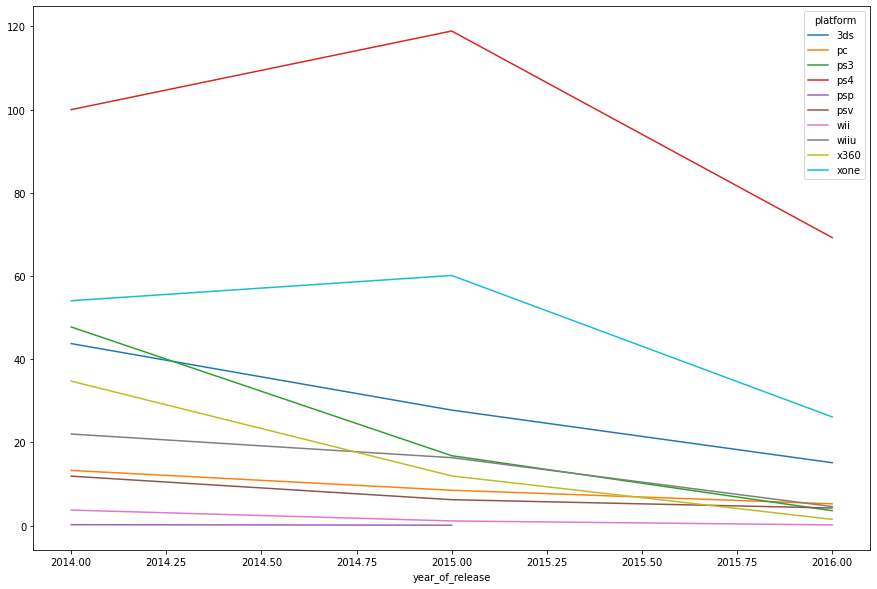

In [34]:
#посмотрим динамику продаж по всем платформам за актуальный период
df2.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(figsize=(15, 10))

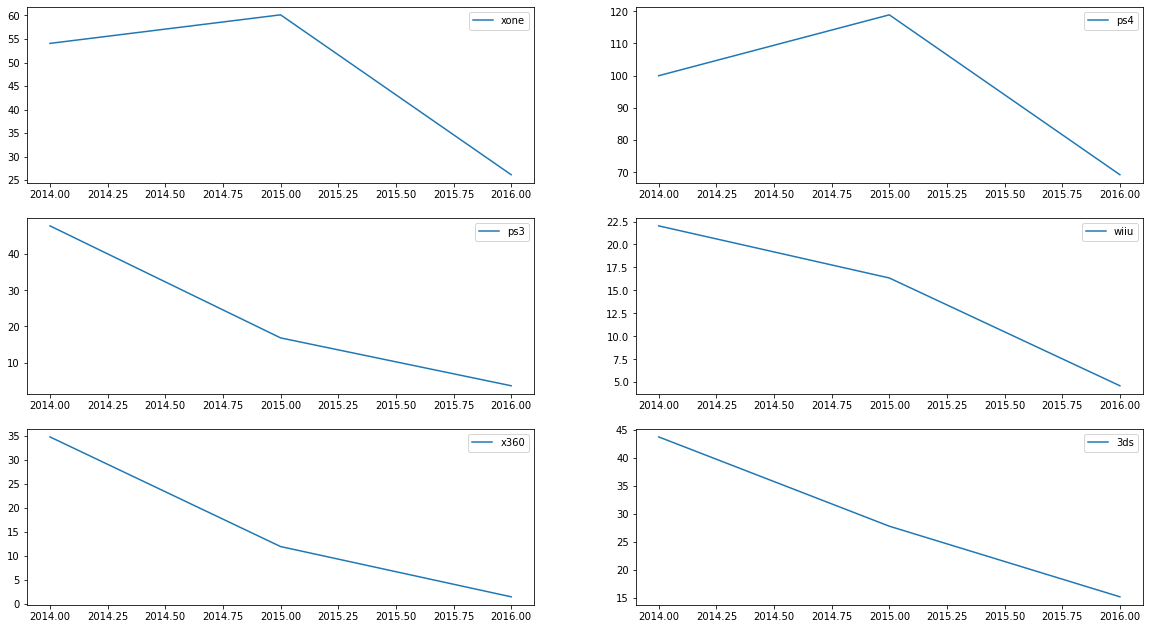

In [35]:
#посмотрим более детально ТОП-6 платформ
xone = df2[df2['platform'] == 'xone'].groupby('year_of_release').agg({'total_sales':'sum'})
ps4 = df2[df2['platform'] == 'ps4'].groupby('year_of_release').agg({'total_sales':'sum'})
ps3 = df2[df2['platform'] == 'ps3'].groupby('year_of_release').agg({'total_sales':'sum'})
wiiu = df2[df2['platform'] == 'wiiu'].groupby('year_of_release').agg({'total_sales':'sum'})
x360 = df2[df2['platform'] == 'x360'].groupby('year_of_release').agg({'total_sales':'sum'})
_3ds = df2[df2['platform'] == '3ds'].groupby('year_of_release').agg({'total_sales':'sum'})
plt.figure(figsize=(20, 11)) # настроим размер поля графиков
plt.subplot(321)
plt.plot(xone)
plt.legend(['xone'])
plt.subplot(322)
plt.plot(ps4)
plt.legend(['ps4'])
plt.subplot(323)
plt.plot(ps3)
plt.legend(['ps3'])
plt.subplot(324)
plt.plot(wiiu)
plt.legend(['wiiu'])
plt.subplot(325)
plt.plot(x360)
plt.legend(['x360'])
plt.subplot(326)
plt.plot(_3ds)
plt.legend(['3ds'])

**Вывод:** в актуальном периоде лидируют по продажам платформы ps4, xone, 3ds. В сравнении с общими данными, которые мы изучали ранее, с лидирующих позиций ушла ps2, что логино так как ps4 пришла ей на смену. Общая характеристика платформ следующая:  
- из относительно новых платформ выделяются xone и ps4, которые хоть и падают, но продажи в 2016 году у них самые высокие и около 7 лет в запасе от среднего жизненного цикла платформ
- также в списке новых платформ есть wiiu - значительно отстает по продажам от лидеров, но есть 5-6 лет в запасе от жизненного цикла и есть время на то, чтобы выстрелить.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [36]:
df2.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,888.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,72.306407,6.623536,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,12.213500,1.589792,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


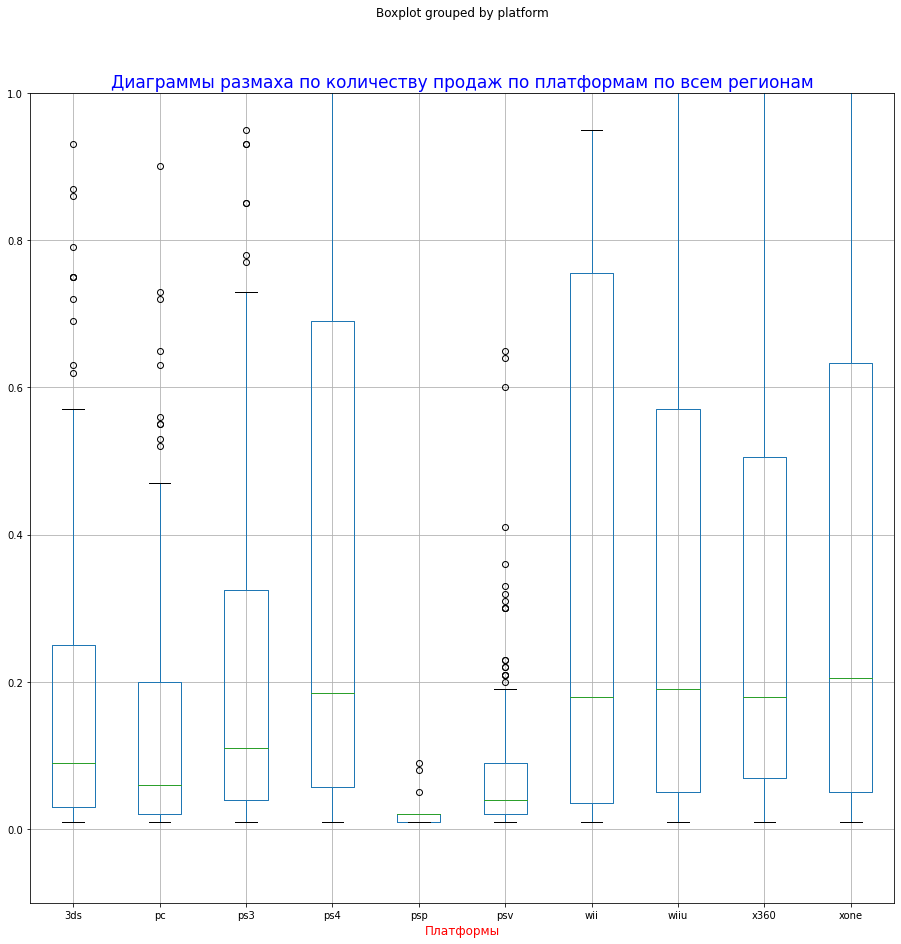

In [37]:
df2.boxplot('total_sales', by='platform',figsize=(15,15)).set_ylim(-0.1,1)
plt.title('Диаграммы размаха по количеству продаж по платформам по всем регионам', fontsize=17, color='blue')
plt.xlabel('Платформы',fontsize=12, color='red')
plt.grid(True)
plt.show()

**Вывод:** разброс выше верхнего квартиля предположительно отражает рекламу/продвижение платформ и инвестиции. Как мы видим Nintendo, PlayStation и Xbox пользуются особой популярностью среди инвесторов и обладают значительными бюджетами на рекламу.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

Для анализа возьмем платформу ps4.

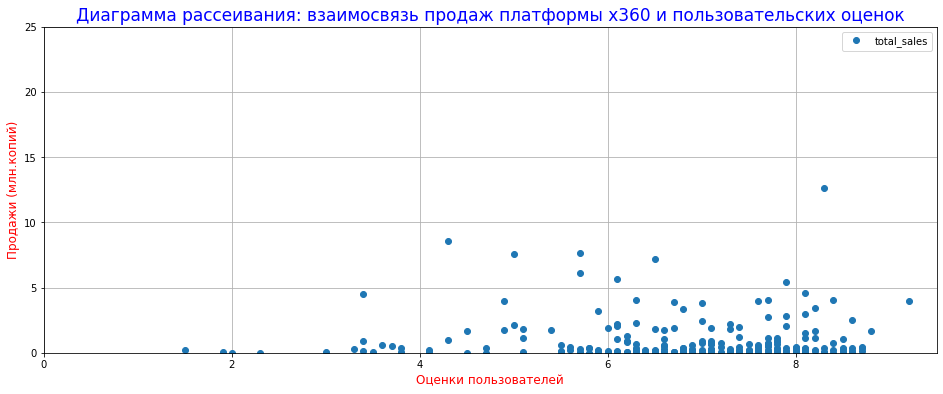

In [38]:
#посмотрим как влияют оценки пользователей на продажи x360
df2[df2['platform'] == 'ps4'].plot(x='user_score', y='total_sales', ylim=(0, 25), xlim=(0, 9.5), style='o', grid=True,  figsize=(16, 6))
plt.title('Диаграмма рассеивания: взаимосвязь продаж платформы x360 и пользовательских оценок', fontsize=17, color='blue')
plt.xlabel('Оценки пользователей',fontsize=12, color='red')
plt.ylabel('Продажи (млн.копий)', fontsize=12, color='red')
plt.grid(True)
plt.show()

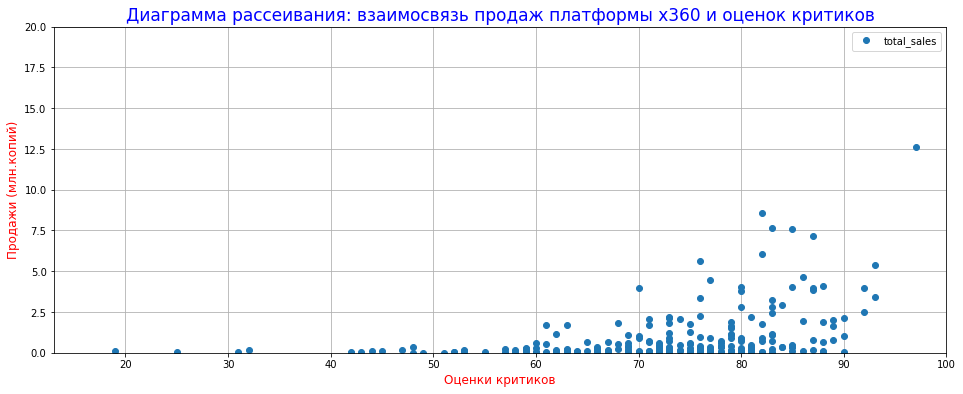

In [39]:
#посмотрим как влияют оценки экспертов на продажи x360
df2[df2['platform'] == 'ps4'].plot(x='critic_score', y='total_sales', ylim=(0, 20), xlim=(13, 100), style='o', grid=True,  figsize=(16, 6))
plt.title('Диаграмма рассеивания: взаимосвязь продаж платформы x360 и оценок критиков', fontsize=17, color='blue')
plt.xlabel('Оценки критиков',fontsize=12, color='red')
plt.ylabel('Продажи (млн.копий)',fontsize=12, color='red')
plt.grid(True)
plt.show()

In [40]:
#отберем из актуальной таблицы платформу ps4
df2_ps4 = df2[df2['platform'] == 'ps4']
#создадим таблицу с интересующими нас столбцами
df_pc4_score =df2_ps4[['total_sales', 'critic_score', 'user_score']]
#посчитаем корреляцию
df_pc4_score.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Диаграммы рассеивания показали взаимосвязь общих продаж с оценкой критиков и отсутствие взаимосвязи продаж и оценки пользователей. Посчитав корреляцию и применив шкалу Чеддока видим, что корреляция между оценками критиков и продажами слабая.

Выводы мы сделали только по одной платформе, самой популярной. Проверим это предположение на оставшихся 4х топовых платформах -  посчитаем корреляцию между отзывами и продажами, а также построим диаграмму рассеивания для всех популярных платформ.

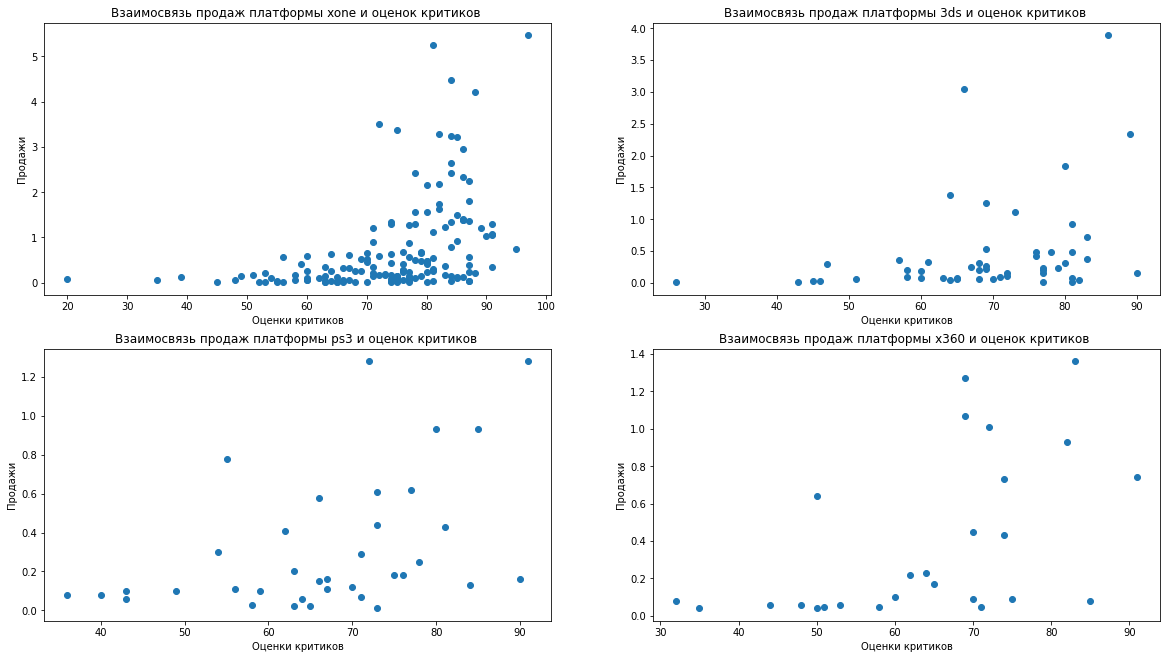

In [41]:
#посмотрим более детально оставшиеся платформы из ТОП-5 и взаимосвязь их продаж и оценок критиков
fig = plt.figure(figsize=(20, 11))
plt.subplot(2, 2, 1)
plt.scatter(x='critic_score', y='total_sales', data = df2[df2['platform'] == 'xone'])
plt.title('Взаимосвязь продаж платформы xone и оценок критиков ')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.subplot(2, 2, 2)
plt.scatter(x='critic_score', y='total_sales', data = df2[df2['platform'] == '3ds'])
plt.title('Взаимосвязь продаж платформы 3ds и оценок критиков ')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.subplot(2, 2, 3)
plt.scatter(x='critic_score', y='total_sales', data = df2[df2['platform'] == 'ps3'])
plt.title('Взаимосвязь продаж платформы ps3 и оценок критиков ')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.subplot(2, 2, 4)
plt.scatter(x='critic_score', y='total_sales', data = df2[df2['platform'] == 'x360'])
plt.title('Взаимосвязь продаж платформы x360 и оценок критиков ')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.show()

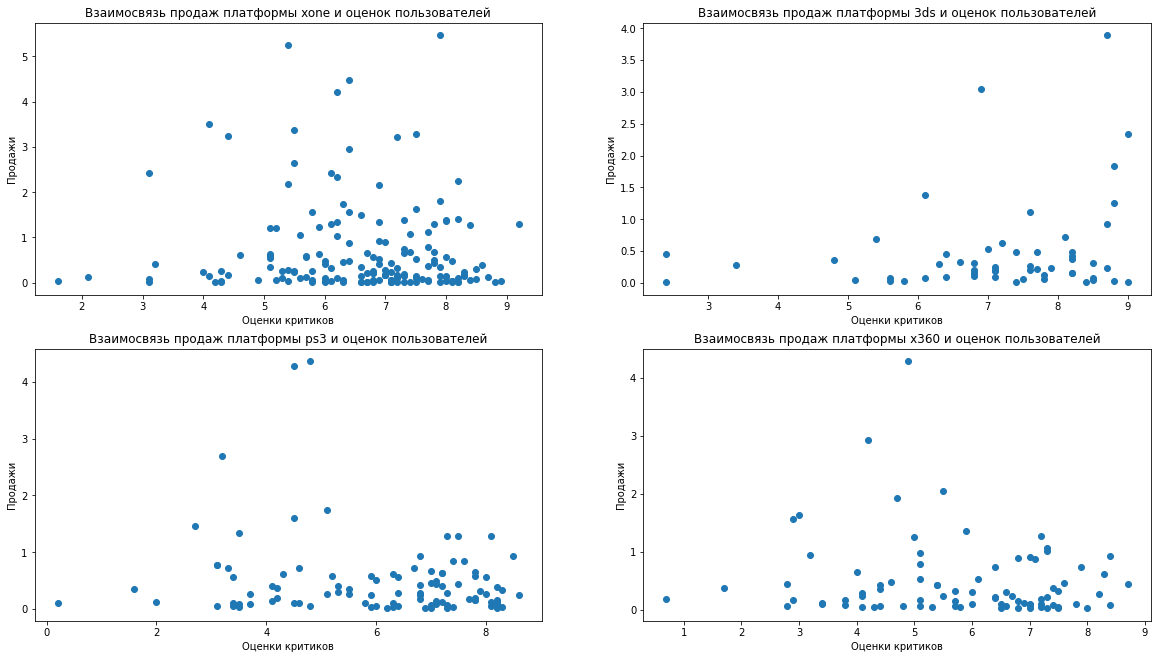

In [42]:
#посмотрим более детально оставшиеся платформы из ТОП-5 и взаимосвязь их продаж и оценок критиков
fig = plt.figure(figsize=(20, 11))
plt.subplot(2, 2, 1)
plt.scatter(x='user_score', y='total_sales', data = df2[df2['platform'] == 'xone'])
plt.title('Взаимосвязь продаж платформы xone и оценок пользователей')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.subplot(2, 2, 2)
plt.scatter(x='user_score', y='total_sales', data = df2[df2['platform'] == '3ds'])
plt.title('Взаимосвязь продаж платформы 3ds и оценок пользователей')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.subplot(2, 2, 3)
plt.scatter(x='user_score', y='total_sales', data = df2[df2['platform'] == 'ps3'])
plt.title('Взаимосвязь продаж платформы ps3 и оценок пользователей')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.subplot(2, 2, 4)
plt.scatter(x='user_score', y='total_sales', data = df2[df2['platform'] == 'x360'])
plt.title('Взаимосвязь продаж платформы x360 и оценок пользователей')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')

plt.show()

In [43]:
#отберем из актуальной таблицы платформу xone
df2_xone = df2[df2['platform'] == 'xone']
#создадим таблицу с интересующими нас столбцами
df_xone_score =df2_xone[['total_sales', 'critic_score', 'user_score']]
#посчитаем корреляцию
print('Корреляция между продажами платформы xone и оценками критиков и пользователей:')
display(df_xone_score.corr())
print('____________________________________________________')

#отберем из актуальной таблицы платформу 3ds
df2_3ds = df2[df2['platform'] == '3ds']
#создадим таблицу с интересующими нас столбцами
df_3ds_score =df2_3ds[['total_sales', 'critic_score', 'user_score']]
#посчитаем корреляцию
print('Корреляция между продажами платформы 3ds и оценками критиков и пользователей:')
display(df_3ds_score.corr())
print('____________________________________________________')

#отберем из актуальной таблицы платформу ps3
df2_ps3 = df2[df2['platform'] == 'ps3']
#создадим таблицу с интересующими нас столбцами
df_ps3_score =df2_ps3[['total_sales', 'critic_score', 'user_score']]
#посчитаем корреляцию
print('Корреляция между продажами платформы ps3 и оценками критиков и пользователей:')
display(df_ps3_score.corr())
print('____________________________________________________')

#отберем из актуальной таблицы платформу x360
df2_x360 = df2[df2['platform'] == 'x360']
#создадим таблицу с интересующими нас столбцами
df_x360_score =df2_x360[['total_sales', 'critic_score', 'user_score']]
#посчитаем корреляцию
print('Корреляция между продажами платформы x360 и оценками критиков и пользователей:')
display(df_x360_score.corr())
print('____________________________________________________')

Корреляция между продажами платформы xone и оценками критиков и пользователей:


,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


____________________________________________________
Корреляция между продажами платформы 3ds и оценками критиков и пользователей:


,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


____________________________________________________
Корреляция между продажами платформы ps3 и оценками критиков и пользователей:


,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


____________________________________________________
Корреляция между продажами платформы x360 и оценками критиков и пользователей:


,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


____________________________________________________


**Вывод**: предроложение подтвердилось. Диаграммы рассеивания показали взаимосвязь общих продаж с оценкой критиков и отсутствие взаимосвязи продаж и оценки пользователей. Посчитав корреляцию и применив шкалу Чеддока видим, что корреляция между оценками критиков/пользователей и продажами слабая.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [44]:
#посмотрим сколько игр представленно в разных жанрах, отсортируем по убыванию
most_popular_genre = df2.groupby('genre').agg({'name':'count', 'total_sales':'sum'}).reset_index()
most_popular_genre.sort_values(by='name', ascending=False).head(12)

,genre,name,total_sales
0,action,619,199.36
7,role-playing,221,101.44
1,adventure,185,17.55
10,sports,161,109.48
8,shooter,128,170.94
3,misc,113,37.55
6,racing,69,27.52
2,fighting,60,28.22
9,simulation,44,13.13
4,platform,38,18.09


In [45]:
#посмотрим долю продаж на одну игру в каждом жанре, добавим новый столбец
most_popular_genre['sales_per_game'] = most_popular_genre['total_sales']/most_popular_genre['name']
most_popular_genre.sort_values(by='sales_per_game', ascending=False).head(12)

,genre,name,total_sales,sales_per_game
8,shooter,128,170.94,1.335469
10,sports,161,109.48,0.680000
4,platform,38,18.09,0.476053
2,fighting,60,28.22,0.470333
7,role-playing,221,101.44,0.459005
6,racing,69,27.52,0.398841
3,misc,113,37.55,0.332301
0,action,619,199.36,0.322068
9,simulation,44,13.13,0.298409
5,puzzle,14,2.21,0.157857


**Вывод:** самые рейтинговые жанры по продажам это action, sports, shooter, misc, role-playing. Менее прибыльные жанры strategy, puzzle, adventure, fighting, simulation. Но есть интересное наблюдение: в жанрах shooter и simulation практически одинаковое количество игр 737 и 606 соответственно, но по продажам игры жанра shooter практически в 3 раза обходят игры жанра симуляции и более того, они обгоняют таких лидеров по количеству игр как misc и role-playing. Посчитав долю продаж на одну игру по жанрам выявили, что среди всех жанров самые дорогие игры в Стрелялках, Платформах, Спорт, Гонки и RPG.

## Составьте портрет пользователя каждого региона   <a class="anchor" id="fourth-bullet"></a>

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [46]:
#посмотрим ТОП 5 платформ по продажам для разных регионов
na_platform = df2.groupby('platform').agg({'na_sales':'sum'}).reset_index()
top5_na = na_platform.sort_values(by='na_sales', ascending=False).head(5)
display(top5_na)

eu_platform = df2.groupby('platform').agg({'eu_sales':'sum'}).reset_index()
top5_eu = eu_platform.sort_values(by='eu_sales', ascending=False).head(5)
display(top5_eu)

jp_platform = df2.groupby('platform').agg({'jp_sales':'sum'}).reset_index()
top5_jp = jp_platform.sort_values(by='jp_sales', ascending=False).head(5)
display(top5_jp)


,platform,na_sales
3,ps4,98.61
9,xone,81.27
8,x360,28.30
0,3ds,22.64
2,ps3,22.05


,platform,eu_sales
3,ps4,130.04
9,xone,46.25
2,ps3,25.54
1,pc,17.97
0,3ds,16.12


,platform,jp_sales
0,3ds,44.24
3,ps4,15.02
5,psv,14.54
2,ps3,11.22
7,wiiu,7.31


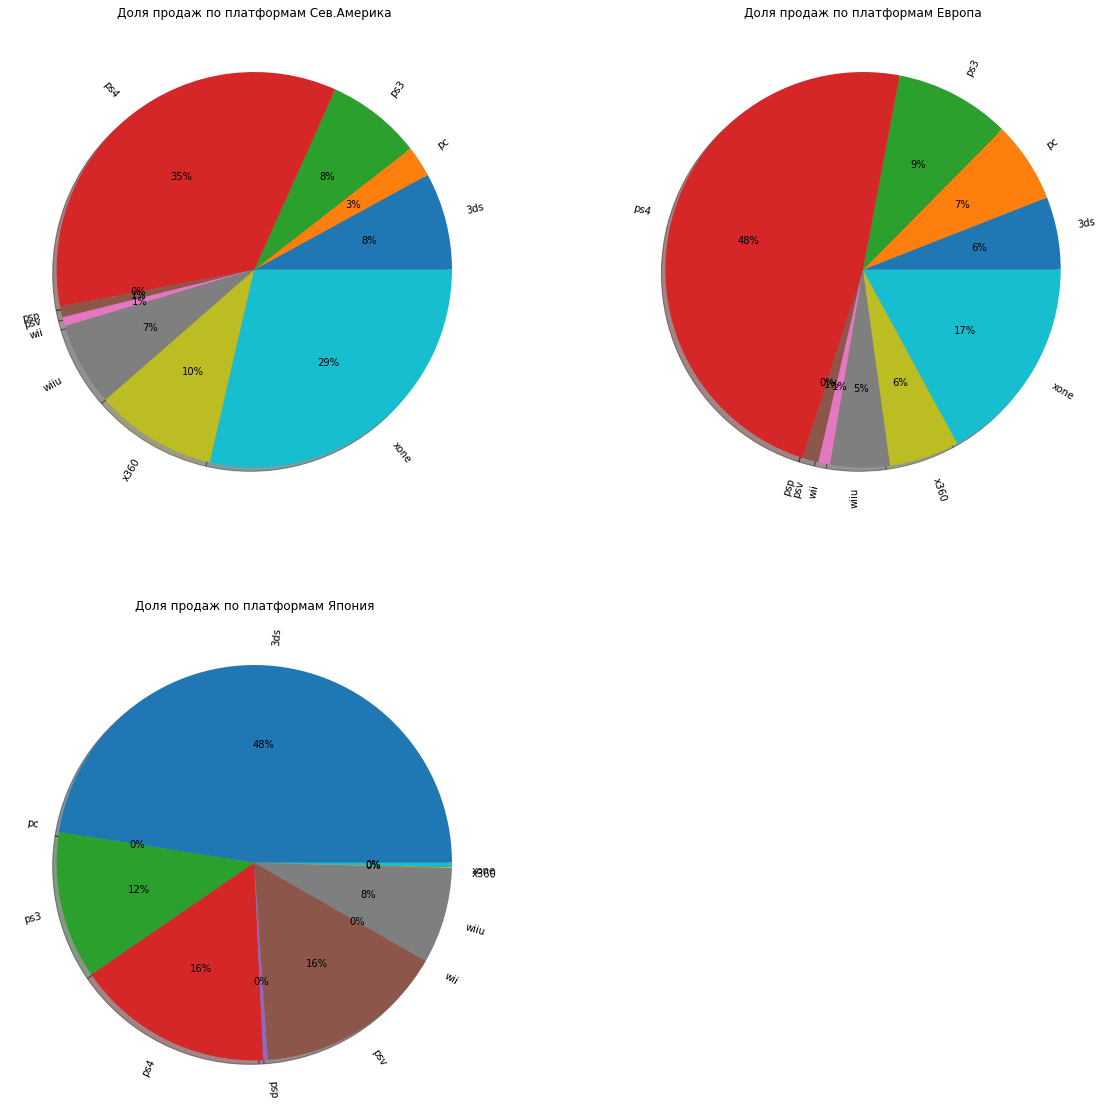

In [47]:
fig = plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.pie(na_platform['na_sales'], labels=na_platform['platform'], autopct='%.0f%%', rotatelabels=True, radius=1, shadow=True)
plt.title('Доля продаж по платформам Сев.Америка')

plt.subplot(2, 2, 2)
plt.pie(eu_platform['eu_sales'], labels=eu_platform['platform'], autopct='%.0f%%', rotatelabels=True, radius=1, shadow=True)
plt.title('Доля продаж по платформам Европа')

plt.subplot(2, 2, 3)
plt.pie(jp_platform['jp_sales'], labels=jp_platform['platform'], autopct='%.0f%%', rotatelabels=True, radius=1, shadow=True)
plt.title('Доля продаж по платформам Япония')

plt.show()

**Вывод**: 
- в Америке играют в приставки Xone и PS4, меньше в xone и ps3
- в Европе предпочитают PlayStation4 практически 50%, меньше Xone 17%
- в Японии интересный перекос в пользу портативных консолей Денди. Nintendo 3DS - 48%, PlayStation4 - 16%, PlayStation Vita - 16%, PlayStation3 12%,


### Самые популярные жанры (топ-5). Поясните разницу.

In [48]:
#посмотрим ТОП 5 популярных жанров для разных регионов
na_genre = df2.groupby('genre').agg({'na_sales':'sum'}).reset_index()
top5_na_genre = na_genre.sort_values(by='na_sales', ascending=False).head(5)
display(top5_na_genre)

eu_genre = df2.groupby('genre').agg({'eu_sales':'sum'}).reset_index()
top5_eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False).head(5)
display(top5_eu_genre)

jp_genre = df2.groupby('genre').agg({'jp_sales':'sum'}).reset_index()
top5_jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False).head(5)
display(top5_jp_genre)

,genre,na_sales
8,shooter,79.02
0,action,72.53
10,sports,46.13
7,role-playing,33.47
3,misc,15.05


,genre,eu_sales
0,action,74.68
8,shooter,65.52
10,sports,45.73
7,role-playing,28.17
6,racing,14.13


,genre,jp_sales
7,role-playing,31.16
0,action,29.58
2,fighting,6.37
3,misc,5.61
8,shooter,4.87


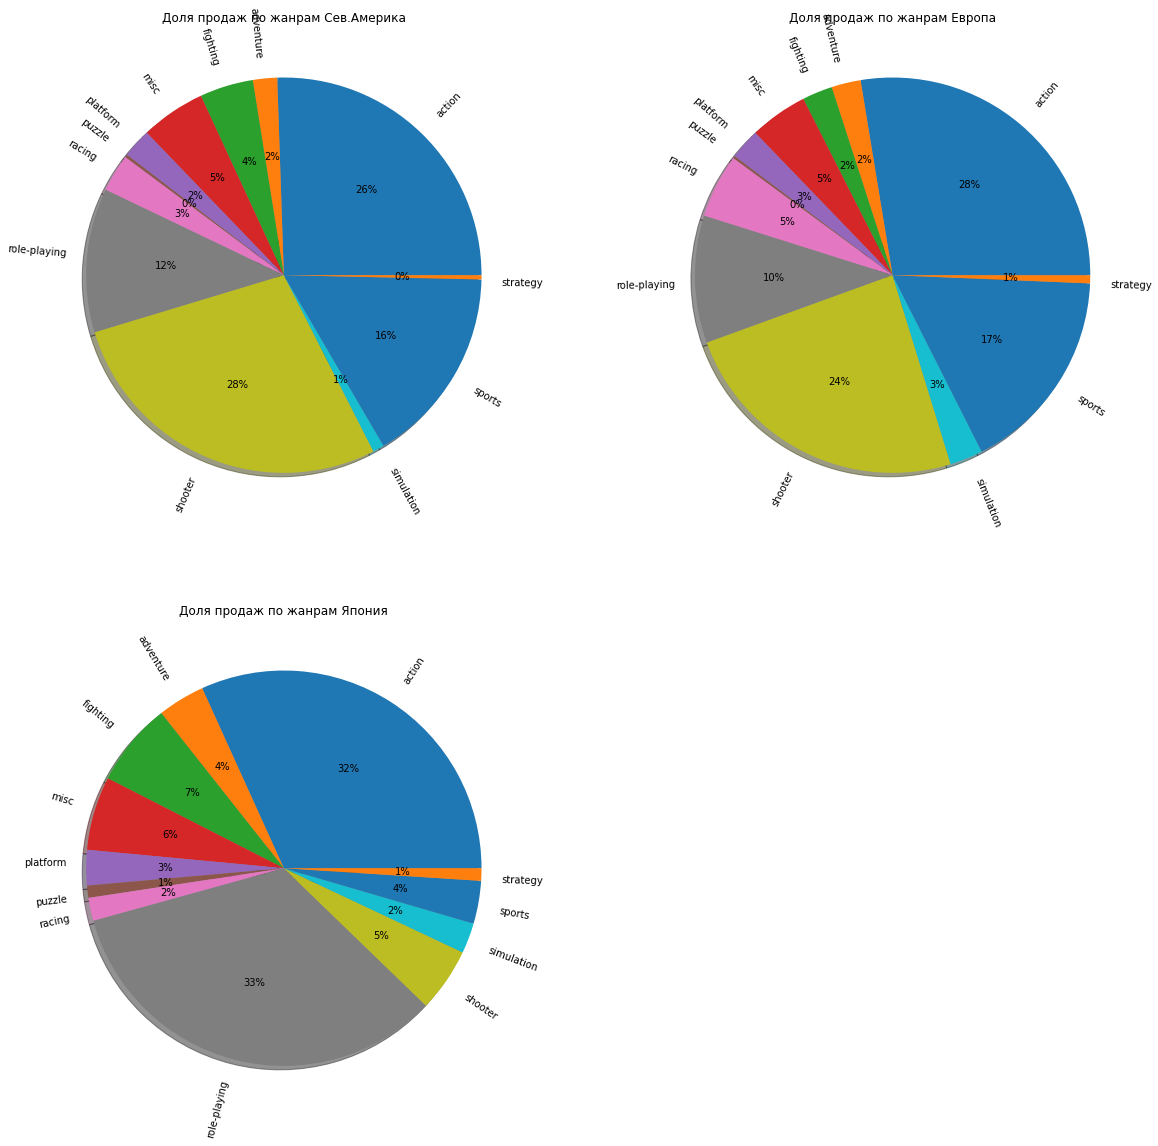

In [49]:
fig = plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.pie(na_genre['na_sales'], labels=na_genre['genre'], autopct='%.0f%%', rotatelabels=True, radius=1, shadow=True)
plt.title('Доля продаж по жанрам Сев.Америка')

plt.subplot(2, 2, 2)
plt.pie(eu_genre['eu_sales'], labels=eu_genre['genre'], autopct='%.0f%%', rotatelabels=True, radius=1, shadow=True)
plt.title('Доля продаж по жанрам Европа')

plt.subplot(2, 2, 3)
plt.pie(jp_genre['jp_sales'], labels=jp_genre['genre'], autopct='%.0f%%', rotatelabels=True, radius=1, shadow=True)
plt.title('Доля продаж по жанрам Япония')

plt.show()

**Вывод**: 
- в Америке и Европе практически идентичный расклад - играют в экшен, стрелялки, спортивные игры и в ролевые игры. 
- Япония значительно отличается по предпочитаемым жанрам. Преобладают экшен 32% и ролевые игры 33%.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [50]:
df2['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

In [51]:
#обозначим пропуски tbd чтобы их не потерять при анализе
df2['rating'] = df2['rating'].fillna('tbd')

/tmp/ipykernel_1237/2708714634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rating'] = df2['rating'].fillna('tbd')


In [52]:
na_rating = df2.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False)
na_rating.head(10)

,rating,na_sales
2,M,96.42
4,tbd,64.72
0,E,50.74
3,T,38.95
1,E10+,33.23


In [53]:
eu_rating = df2.groupby('rating').agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False)
eu_rating

,rating,eu_sales
2,M,93.44
4,tbd,58.95
0,E,58.06
3,T,34.07
1,E10+,26.16


In [54]:
jp_rating = df2.groupby('rating').agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False)
jp_rating

,rating,jp_sales
4,tbd,56.90
3,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


In [55]:
#объединим в одну таблицу продажи по рейтингам во всех регионах
naeu_rating = na_rating.merge(eu_rating, on=['rating'], how='outer')
total_rating = naeu_rating.merge(jp_rating, on=['rating'], how='outer')
total_rating

,rating,na_sales,eu_sales,jp_sales
0,M,96.42,93.44,8.01
1,tbd,64.72,58.95,56.90
2,E,50.74,58.06,8.94
3,T,38.95,34.07,14.78
4,E10+,33.23,26.16,4.46


Text(0.5, 1.0, 'Продажи по регионам в зависимости от рейтинга ESRB')

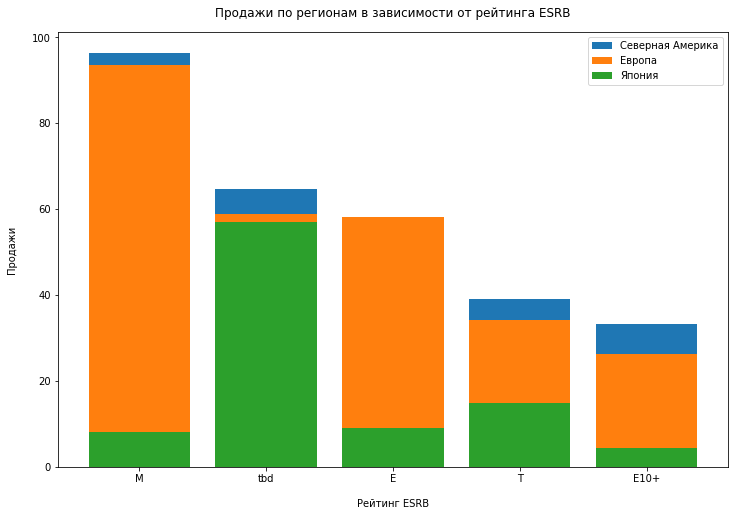

In [56]:
#посмотрим наглядно на продажи по рейтингам ESRB во всех регионах
fig, ax = plt.subplots(figsize=(12, 8))

b1 = ax.bar(total_rating['rating'], total_rating['na_sales'], label='Северная Америка')
b2 = ax.bar(total_rating['rating'], total_rating['eu_sales'], label='Европа')
b3 = ax.bar(total_rating['rating'], total_rating['jp_sales'], label='Япония')

ax.legend()

ax.set_xlabel('Рейтинг ESRB', labelpad=15)
ax.set_ylabel('Продажи', labelpad=15)
ax.set_title('Продажи по регионам в зависимости от рейтинга ESRB', pad=15)

In [57]:
#проверим распределение количества игр по рейтингам
df2.groupby('rating').agg({'name':'count'})

,name
rating,
E,219
E10+,185
M,265
T,271
tbd,749


Расшифровка рейтинга:
- «EC» («Early childhood») — «Для детей младшего возраста» 
- «E» («Everyone») — «Для всех» 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» 
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых» 
- «RP» («Rating Pending») — «Рейтинг ожидается»

**Вывод:**
- В Америке и Европе схожая ситуация - рейтинги игр по убываю продаж - «Для взрослых», «Без рейтинга», «Для всех», «Подросткам», «Для всех от 10 лет и старше». Это говорит что потребители игр в этих регионах в основном взрослые.
- В Японии сильно отличается ситуация. Преобладают продажи игр «Без рейтинга», «Подросткам»,  «Для всех» и «Для всех от 10 лет и старше». Отдельно не выделяется категория Для взрослых, так как скорее всего в эту категорию попадают все игры для взрослых.
- Игры с рейтингом «Для детей младшего возраста» не пользуются спросом ни в одном из регионов, а посмотрев на распределение количества игр по рейтингам видно что для детей младшего возраста игры практически не выпускаются.

## Проверка гипотез   <a class="anchor" id="fifth-bullet"></a>
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Задайте самостоятельно пороговое значение alpha. Поясните: Как вы сформулировали нулевую и альтернативную гипотезы;  -  - Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверяем двухстороннию гипотезу что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Проверим на полной генеральной совокупности(df)
- **Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC равны
- **Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC не равны

In [58]:
print('Средний пользовательский рейтинг  Xbox One = ', round(df2.query('platform == "x360"')['user_score'].mean(), 2))
print('Средний пользовательский рейтинг        PC = ', round(df2.query('platform == "pc"')['user_score'].mean(), 2))

Средний пользовательский рейтинг  Xbox One =  5.77
Средний пользовательский рейтинг        PC =  6.3


In [59]:
display(df2.query('platform == "x360"')['user_score'].describe())
display(df2.query('platform == "pc"')['user_score'].describe())

count    83.000000
mean      5.771084
std       1.709623
min       0.700000
25%       4.500000
50%       6.000000
75%       7.200000
max       8.700000
Name: user_score, dtype: float64

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [60]:
p1 = df2.dropna().query('platform == "x360"')['user_score']
p2 = df2.dropna().query('platform == "pc"')['user_score']

alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(p1, p2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5749108875559878
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC равны. Нет статистически значимой разницы между выборками -  между средними пользовательскими рейтингами платформ Xbox One и PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверяем двухстороннию гипотезу что средние пользовательские рейтинги жанров Action и Sports разные. Проверим на полной генеральной совокупности(df)
- **Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports равны; 
- **Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports не равны;

In [61]:
print('Средний пользовательскиq рейтинг  жанра Action = ', round(df2.query('genre == "action"')['user_score'].mean(), 2))
print('Средний пользовательскиq рейтинг  жанра  Sports = ', round(df2.query('genre == "sports"')['user_score'].mean(), 2))

Средний пользовательскиq рейтинг  жанра Action =  6.76
Средний пользовательскиq рейтинг  жанра  Sports =  5.23


In [62]:
display(df2.query('genre == "action"')['user_score'].describe())
display(df2.query('genre == "sports"')['user_score'].describe())

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

In [66]:
g1 = df2.dropna().query('genre == "action"')['user_score']
g2 = df2.dropna().query('genre == "sports"')['user_score']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(g1, g2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.0540895999943536e-10
Отвергаем нулевую гипотезу


**Вывод**:Полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров Action и Sports не равны. Средние пользовательские рейтинги жанров Action и Sports значимо различаются

## Общий вывод   <a class="anchor" id="fifth-bullet"></a>

**При подготовке данных:**
- Заменили названия столбцов (привели их к нижнему регистру);
- Заменили тип данных user_score на число с плавающей точкой, так как именно в таком виде представленны пользовательские оценки и привели к целому числу значения в столбце year_of_release
- Нашли 2424 tbd значения в столбце с оценкой пользователей. Это сокращение часто используется в сфере компьютерных игр и буквально расшифровывается как To Be Determined - "Будет определено" - и обозначает обычно пропуски. Заменим tbd на более понятный nan.
- Удалили строчки с пропущенными названиями игр и платформ, так как это 2 дубля, которые мы нашли ранее, и они помешали бы нам при дальнейшем анализе.
- Удалили строчки с пропущенными годами, так как доля их незначительна 0.016, а причину пропусков мы выяснить не можем. Заменять эти пропуски на года из других строк (по этим же играм и платформам) нет смысла, так как ранее, когда искали дубликаты, мы выяснили что в таблице представленны также одни и те же игры, но с разными датами релизов. В дальнейшем анализе значения этого столбца нам крайне важны, поэтому принято решение удалить эти строки.
- Пропуски в столбцах с оценками и рейтингом мы удалять/заполнять не стали, так как нам также не известны причины отсутствия этих данных, но в данном случае доля пропущенных значений слишком велика и удаление повлияет на дальнейший анализ.
- Удалили строку 16230, так как ранее мы выяснили что это дубликат одной из строк
- Посчитайте суммарные продажи во всех регионах и записали их в отдельный столбец total_sales

**Исследовательский анализ данных**
- Начало роста появления игр 1994 год. Резкие скачки роста в 2000 и 2004 обусловлены скорее всего выходом консолей и развитием игровой индустрии. Далее после 2007 резкий спад, вызванный насещием рынка. Для прогноза на следующий период нам важны данные после 2006 года, так как они актуальнее всего описывают текущую ситацию на игровом рынке. Поэтому актуальным периодом для прогноза будем считать период после 2014 года.
- Продажи по платформам сильно отличаются друг от друга. Выделила для анализа топ-5 платформ по продажам за весь период (ps2, x360, ps3, wii, ds) и тут мы видим закономерность у первых трёх: появление и исчезновение платформы занимает в среднем 10 лет. Но как мы видим не для всех платформ характерна такая тенденция, например Nintendo DS потребовалось 20 лет для того чтобы выстрелить по продажам и ещё 10 лет до окончательного спада, а wii (наследница того же Nintendo) уходила с рынка более 4х лет и общий цикл жизни платформы был более 10 лет. Далее проверила срок жизни у остальных платформ и выявила, что чаще всего появляются новые и исчезают старые платформы ориентировочно за 10-12 лет, среднее значение 7 лет. 	
- Ранее предположили что актуальный период начинается с 2014 года, а с учетом того что жизненный цикл платформы чаще всего равен 10 годам, то актуальный период подверждается. Поэтому на этом этапе создали таблицу без данных до 2014 года. 
- в актуальном периоде лидируют по продажам платформы ps4, xone, 3ds. В сравнении с общими данными, которые мы изучали ранее, с лидирующих позиций ушла ps2, что логино так как ps4 пришла ей на смену. Общая характеристика платформ следующая:  
   - из относительно новых платформ выделяются xone и ps4, которые хоть и падают, но продажи в 2016 году у них самые высокие и около 7 лет в запасе от среднего жизненного цикла платформ
   - также в списке новых платформ есть wiiu - значительно отстает по продажам от лидеров, но есть 5-6 лет в запасе от жизненного цикла и есть время на то, чтобы выстрелить.
- Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Разброс выше верхнего квартиля предположительно отражает рекламу/продвижение платформ и инвестиции. Как мы видим Nintendo, PlayStation и Xbox пользуются особой популярностью среди инвесторов и обладают значительными бюджетами на рекламу.
-  Диаграммы рассеивания показали взаимосвязь общих продаж с оценкой критиков и отсутствие взаимосвязи продаж и оценки пользователей. Посчитав корреляцию и применив шкалу Чеддока видим, что корреляция между оценками критиков/пользователей и продажами слабая.
- Самые рейтинговые жанры по продажам это action, sports, shooter, misc, role-playing. Менее прибыльные жанры strategy, puzzle, adventure, fighting, simulation. Но есть интересное наблюдение: в жанрах shooter и simulation практически одинаковое количество игр 737 и 606 соответственно, но по продажам игры жанра shooter практически в 3 раза обходят игры жанра симуляции и более того, они обгоняют таких лидеров по количеству игр как misc и role-playing. Посчитав долю продаж на одну игру по жанрам выявили, что среди всех жанров самые дорогие игры в Стрелялках, Платформах, Спорт, Гонки и RPG.

**Составьте портрет пользователя каждого региона**:
- в Америке играют в приставки Xone и PS4, меньше в xone и ps3
- в Европе предпочитают PlayStation4 практически 50%, меньше Xone 17%
- в Японии интересный перекос в пользу портативных консолей Денди. Nintendo 3DS - 48%, PlayStation4 - 16%, PlayStation Vita - 16%, PlayStation3 12%,
- в Америке и Европе практически идентичный расклад - играют в экшен, стрелялки, спортивные игры и в ролевые игры. 
- Япония значительно отличается по предпочитаемым жанрам. Преобладают экшен 32% и ролевые игры 33%.
- В Америке и Европе схожая ситуация - рейтинги игр по убываю продаж - «Для взрослых», «Без рейтинга», «Для всех», «Подросткам», «Для всех от 10 лет и старше». Это говорит что потребители игр в этих регионах в основном взрослые.
- В Японии сильно отличается ситуация. Преобладают продажи игр «Без рейтинга», «Подросткам»,  «Для всех» и «Для всех от 10 лет и старше». Отдельно не выделяется категория Для взрослых, так как скорее всего в эту категорию попадают все игры для взрослых.
- Игры с рейтингом «Для детей младшего возраста» не пользуются спросом ни в одном из регионов, а посмотрев на распределение количества игр по рейтингам видно что для детей младшего возраста игры практически не выпускаются.

**Проверка гипотез:**

- Средние пользовательские рейтинги платформ Xbox One и PC равны - Полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC равны. Нет статистически значимой разницы между выборками -  между средними пользовательскими рейтингами платформ Xbox One и PC.
- Средние пользовательские рейтинги жанров Action и Sports разные - Полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров Action и Sports не равны. Средние пользовательские рейтинги жанров Action и Sports значимо различаются

### Итог:
Из всего вышеописанного можно сделать вывод что потенциально популярный продукт по которому нужно спланировать продажи и рекламные кампании это:

- Игоровые платформы  ps4, xone, 3ds. Менее продающиеся, но перспективные: wiiu. В Японии особо уделить внимание портативным консолям.
- Игровые жанры action, sports, shooter, platform, misc, отдельно для Японии role-playing
- Игры рейтинга ESRB «E» («Everyone») — «Для всех» «T» («Teen») — «Подросткам» «M» («Mature») — «Для взрослых». Америка и Европа сделать акцент на взрослых и подростках, в Японии рейтинг ESRB 

Рекомендации:
- всязи со спадом продаж на всех платформах обратить наибольшее внимание на мобильные игры
- если есть возможность вложиться в разработку игр обратить внимание на платформеры шутеры и гонки как приносяшие максимальные продажи на еденицу продукции

 <font color='green' size=5>Итоговый комментарий 2</font> 
 <p>  <p>Мне очень нравится твоя работа. ЧТо мне понравилось: 1) хороший код 2) умение структурировать информацию 3) твои выводы, все четко и по делу. Отлично! Все замечания исправлены. Принимаю твой проект) Получилась хорошая работа. Поздравляю тебя и желаю успехов в обучении!)

